## Storytelling :

### No contexto pandêmico, a compra e venda de vinhos online intensificou-se e um produtor de vinho na França deseja que você crie um modelo de classificação em relação às características da composição de dois estilos de vinhos, o vinho branco e vermelho.

In [29]:
#Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import plot_confusion_matrix

In [30]:
#Leitura de arquivo
df = pd.read_csv('wine_dataset.csv')
print(df.shape)
df.head(7)

(6497, 13)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red


In [31]:
#Apresentação dos de estatística descritiva sobre as colunas do DataFrame
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [32]:
#Busca por valores faltante
print(df.isnull().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64


In [33]:
#Apresentação dos tipos de dados de cada coluna
print(df.dtypes)

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
style                    object
dtype: object


## Análise e visualização de dados

In [34]:
#Número de ocorrencias na coluna de acordo com o valor do tipo de dado categórico
unique, counts = np.unique(df['quality'], return_counts = True)
dict(zip(unique, counts))

{3: 30, 4: 216, 5: 2138, 6: 2836, 7: 1079, 8: 193, 9: 5}

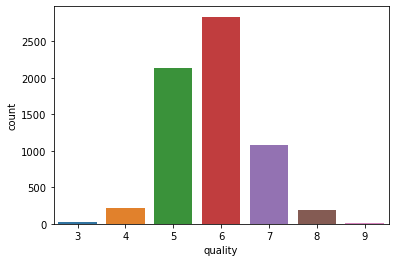

In [35]:
#Gráfico relacionado aos valores apresentados na célula acima
grafico = sns.countplot(x = 'quality', data=df)

In [36]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'style'],
      dtype='object')

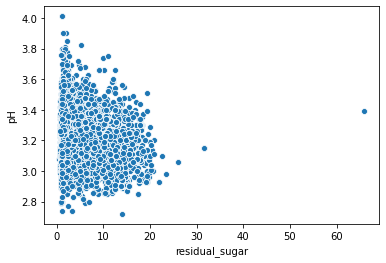

In [37]:
#Gráfico de dispersão do resíduo de açúcar do vinho em relação ao pH
sns.scatterplot(data=df, x="residual_sugar", y="pH")

## Pré-processamento de dados

In [38]:
#Tipos de valores "object" antes da transformação para "category"
df['style'].unique()

array(['red', 'white'], dtype=object)

In [39]:
#Mudança de tipo de dado e utilização do método .cat.codes
df['style'] = df['style'].astype('category').cat.codes 
#método responsável por transformar dados categóricos em categóricos númericos
print(df['style'].unique())

[0 1]


In [40]:
#Separar dados de treino e teste
X_wine = df.drop('style', axis = 1)
#Apresento se minhas colunas preditoras foram separadas da coluna de classe
print(X_wine.columns)

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [41]:
Y_wine = pd.DataFrame(df['style'])
print(Y_wine.columns) #Coluna de classe

Index(['style'], dtype='object')


In [42]:
unique, counts = np.unique(Y_wine, return_counts=True)
dict(zip(unique, counts))

{0: 1599, 1: 4898}

In [43]:
#separarados de forma 80 / 20
#stratify faz com que as proporções de escolha fiquem as mesmas, ou seja, se temos 18% de vinhos brancos e 72% de vinho vermelho
#essa proporção será mantida
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_wine, Y_wine, test_size = 0.20, random_state = 0, stratify = Y_wine)

## Classificação : Árvore de decisão

In [44]:
#Escolha do modelo e treino dos dados
modelo = DecisionTreeClassifier(criterion='entropy')
#O critério de entropia se baseia no ganho de informação, que mede a redução de entropia
#Entropia mede a aleatoriedade do atributo alvo.
modelo.fit(X_treino, Y_treino)

DecisionTreeClassifier(criterion='entropy')

In [45]:
previsao = modelo.predict(X_teste)
print(previsao)

[1 1 1 ... 1 1 0]


In [46]:
#gini = 98.4615
#entropy = 98.5384
print(accuracy_score(Y_teste, previsao)*100)

98.15384615384616


[]

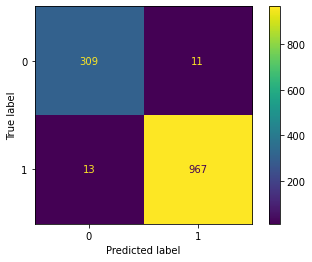

In [47]:
#Gráfico de matriz de confusão
plot_confusion_matrix(modelo, X_teste, Y_teste)
plt.plot()

In [48]:
print(classification_report(Y_teste, previsao))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       320
           1       0.99      0.99      0.99       980

    accuracy                           0.98      1300
   macro avg       0.97      0.98      0.98      1300
weighted avg       0.98      0.98      0.98      1300



## Modelo : Random Forest

In [49]:
#Tamanho dos nossos dados de classe
print(Y_wine.shape)

(6497, 1)


In [50]:
#Tamanho dos nossos dados preditores
print(X_wine.shape)

(6497, 12)


In [56]:
#n_stimators : define quantas árvores teremos no modelo
modelo_random_forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
#np.ravel() responsáevel por fazer com que Y_treino seja uma matriz 1D (contígua)
modelo_random_forest.fit(X_treino, np.ravel(Y_treino))

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [57]:
previsoes_random_forest = modelo_random_forest.predict(X_teste)
print(previsoes_random_forest)

[1 1 1 ... 1 1 0]


In [58]:
#Entropia + n_estimators=10 = accuracy 99.3076
#Gini + n_estimators=10 = accuracy 99.5384
print(accuracy_score(Y_teste, previsoes_random_forest)*100)

99.3076923076923


[]

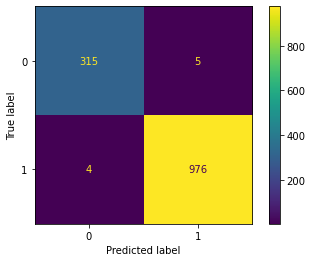

In [59]:
plot_confusion_matrix(modelo_random_forest, X_teste, Y_teste)
plt.plot()

In [55]:
print(classification_report(Y_teste, previsoes_random_forest))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       320
           1       0.99      1.00      1.00       980

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300

